# Cloud Technology Utilization

In [2]:
!pip install pytrends

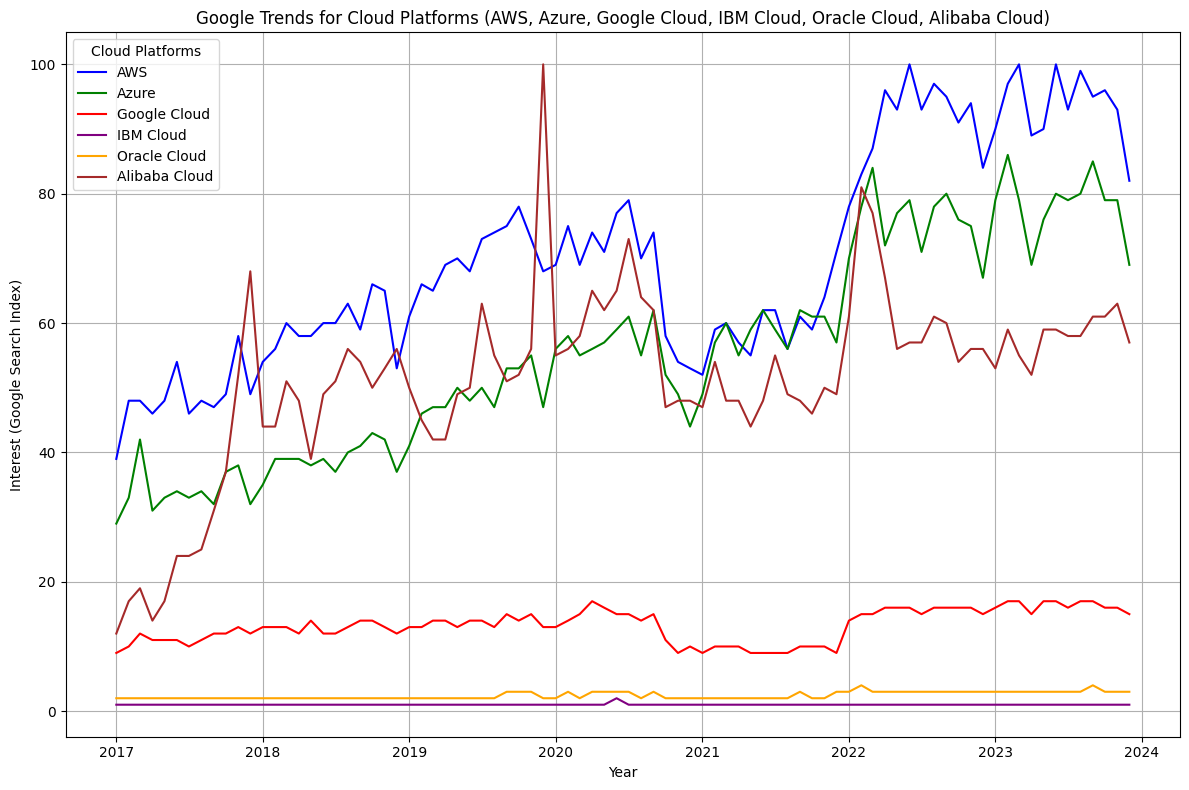

In [4]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize pytrends request object
pytrends = TrendReq(hl='en-US', tz=360)
cloud_platforms_1 = ["AWS", "Azure", "Google Cloud", "IBM Cloud", "Oracle Cloud"]
cloud_platforms_2 = ["Alibaba Cloud"]

# Fix the timeframe to a valid format
timeframe = '2017-01-01 2023-12-31'

# First query for the first 5 cloud platforms
pytrends.build_payload(cloud_platforms_1, cat=0, timeframe=timeframe, geo='', gprop='')

# Get the interest over time for the first 5 platforms
interest_over_time_df_1 = pytrends.interest_over_time()

# Second query for the remaining platform (Alibaba Cloud)
pytrends.build_payload(cloud_platforms_2, cat=0, timeframe=timeframe, geo='', gprop='')

# Get the interest over time for Alibaba Cloud
interest_over_time_df_2 = pytrends.interest_over_time()

# Merge the two dataframes on the date index
interest_over_time_df = pd.concat([interest_over_time_df_1, interest_over_time_df_2], axis=1)

# Check if there's data
if not interest_over_time_df.empty:
    # Remove 'isPartial' column if it exists
    if 'isPartial' in interest_over_time_df.columns:
        interest_over_time_df = interest_over_time_df.drop(columns=['isPartial'])

    plt.figure(figsize=(12, 8))
    plt.plot(interest_over_time_df.index, interest_over_time_df['AWS'], label='AWS', color='blue')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Azure'], label='Azure', color='green')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Google Cloud'], label='Google Cloud', color='red')
    plt.plot(interest_over_time_df.index, interest_over_time_df['IBM Cloud'], label='IBM Cloud', color='purple')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Oracle Cloud'], label='Oracle Cloud', color='orange')
    plt.plot(interest_over_time_df.index, interest_over_time_df['Alibaba Cloud'], label='Alibaba Cloud', color='brown')

    plt.title('Google Trends for Cloud Platforms (AWS, Azure, Google Cloud, IBM Cloud, Oracle Cloud, Alibaba Cloud)')
    plt.xlabel('Year')
    plt.ylabel('Interest (Google Search Index)')
    plt.legend(title='Cloud Platforms')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data retrieved from Google Trends")
